In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import get_dummies

In [3]:
df = pd.read_csv('/content/iris.csv')
df.head()

,petallength,petalwidth,sepallength,sepalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


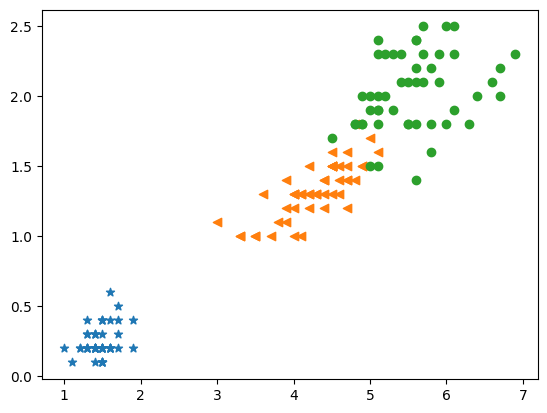

In [23]:
plt.scatter(df[df['species'] == 0]['sepallength'],df[df['species'] == 0]['sepalwidth'], marker='*')
plt.scatter(df[df['species'] == 1]['sepallength'],df[df['species'] == 1]['sepalwidth'], marker='<')
plt.scatter(df[df['species'] == 2]['sepallength'], df[df['species'] == 2]['sepalwidth'], marker='o')

In [6]:
x = df[['petallength', 'petalwidth', 'sepallength', 'sepalwidth']].values
y = df['species'].values

In [7]:
y = get_dummies(y)
y = y.values

In [8]:
x = tf.Variable(x, dtype=tf.float32)

In [9]:
Number_of_features = 4
Number_of_units = 3
# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))
def perceptron(x):
  z = tf.add(tf.matmul(x, weight), bias)
  output = tf.nn.softmax(z)
  return output

In [10]:
optimizer = tf.optimizers.Adam(.01)

In [19]:
def train(iterations):
    for n in range(iterations):
        with tf.GradientTape() as tape:
            logits = perceptron(x)
            loss = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
            )

        # Get gradients
        gradients = tape.gradient(loss, [weight, bias])
        # Apply gradients
        optimizer.apply_gradients(zip(gradients, [weight, bias]))

In [20]:
train(1000)

In [21]:
tf.print(weight)

[[0.684327483 0.895645082 -1.01321769]
 [2.64246345 -1.13437712 -3.20664454]
 [-2.96633554 -0.129371986 3.25728]
 [-2.97383165 -3.13501358 3.23136067]]


In [22]:
ypred=perceptron(x)
ypred=tf.round(ypred)
accuracy_score(y, ypred)

0.98